# Epsilon & Greedy Method

## Prepare the packages

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import random
import numpy as np

import sys
sys.path.append("..")
import epsilon_greedy as eg

## Verification of epsilon exploration

<AxesSubplot: xlabel='coin toss count'>

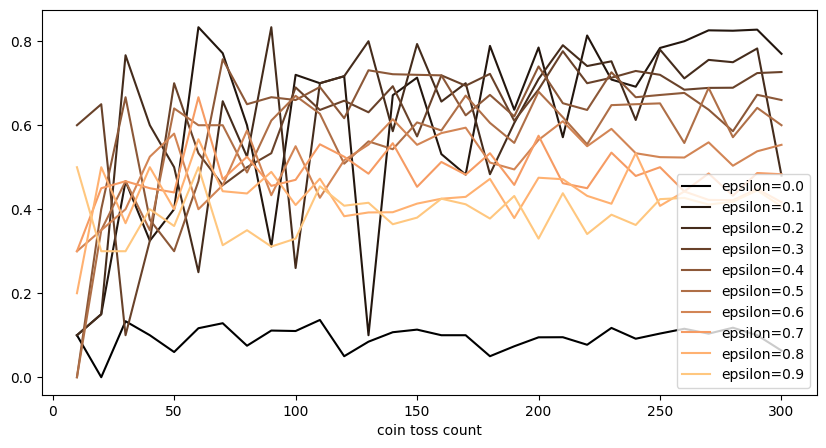

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

env = eg.CoinToss([0.1, 0.5, 0.1, 0.9, 0.1])
epsilons = [x * 0.1 for x in range(10)]
game_steps = list(range(10, 310, 10))
result = {}
for e in epsilons:
    agent = eg.EpsilonGreedyAgent(epsilon=e)
    means = []
    for s in game_steps:
        env.max_episode_steps = s
        rewards = agent.play(env)
        means.append(np.mean(rewards))
    result["epsilon={:.1f}".format(e)] = means
result["coin toss count"] = game_steps
result = pd.DataFrame(result)
result.set_index("coin toss count", drop=True, inplace=True)
result.plot.line(figsize=(10, 5), cmap="copper")